In [63]:
import pandas as pd


# 定义 数据类型
dtypes = {'trade_date': 'str',
          'open': 'float',
          'high': 'float',
          'low': 'float',
          'close': 'float'}

# 按照类型读取数据
source = pd.read_csv('上证50etf.csv', dtype=dtypes)

# 定于日期转换格式
source['trade_date'] = pd.to_datetime(source['trade_date'], format='%Y%m%d')

# 提取相关列
source = source[['trade_date', 'open', 'close', 'high', 'low']]

# 重命名列名
source.columns = ['date', 'open', 'close', 'high', 'low']

# source

,date,open,close,high,low
0,2020-06-19,2.892,2.927,2.938,2.890
1,2020-06-18,2.872,2.895,2.896,2.860
2,2020-06-17,2.876,2.881,2.882,2.863
3,2020-06-16,2.867,2.877,2.879,2.862
4,2020-06-15,2.868,2.847,2.876,2.841
5,2020-06-12,2.847,2.891,2.893,2.841
6,2020-06-11,2.900,2.878,2.910,2.870
7,2020-06-10,2.923,2.908,2.923,2.904
8,2020-06-09,2.908,2.923,2.926,2.902
9,2020-06-08,2.897,2.905,2.920,2.897


In [64]:
import matplotlib.dates as mdates

# Convert 'Timestamp' to 'float'.
# candlestick_ohlc needs time to be in float days format - see date2num().
# 将时间序列转换成为浮点数
source['date'] = [mdates.date2num(d) for d in source['date']]
 
# Re-arrange data so that each row contains values of a day: 'date','open','high','low','close'.
# 将各列转换成tuple类型
quotes = [tuple(x) for x in source[['date','open','high','low','close']].values]
 

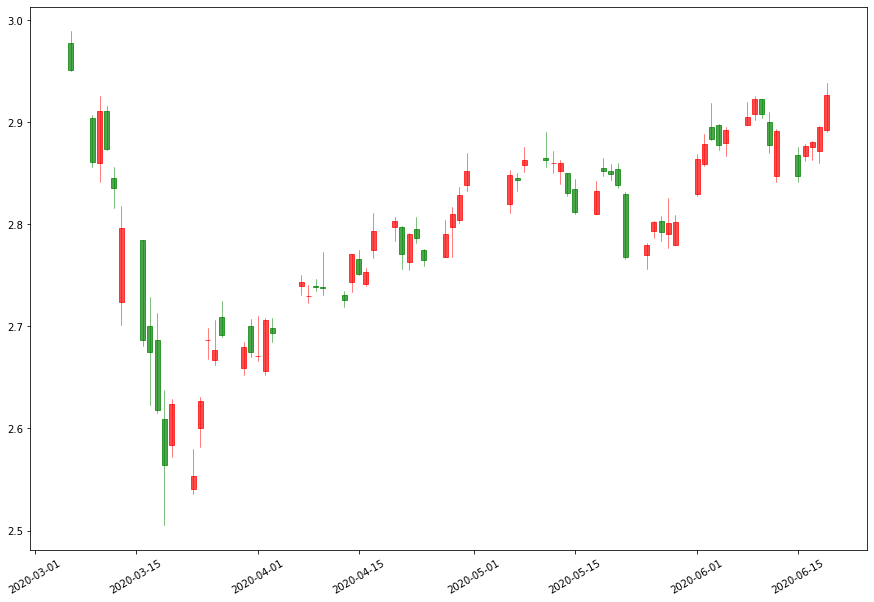

In [67]:
import mpl_finance as mpl
import matplotlib.pyplot as plt

# 定义图片大小
fig, ax = plt.subplots(figsize=(15,10))

# 定义k-线图
mpl.candlestick_ochl(
    ax=ax,
    quotes=source[['date', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)
ax.xaxis_date()
plt.xticks(rotation=30);
plt.show()